In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from math import sqrt, exp
import random
from random import shuffle

In [93]:
# Loading Data
data = pd.read_csv('../data/TSP.csv')
data.head(10)

,index,x,y
0,1,565,575
1,2,25,185
2,3,345,750
3,4,945,685
4,5,845,655
5,6,880,660
6,7,25,230
7,8,525,1000
8,9,580,1175
9,10,650,1130


In [94]:
print(data.shape)

(52, 3)


In [95]:
I = data['index'].tolist()
X = data['x'].tolist()
Y = data['y'].tolist()

In [96]:
def plot_path(points):
    max_length = len(points)
    for i in range(max_length):
        i = points[i] - 1
        i1, x1, y1 = I[i], X[i], Y[i]
        plt.plot(x1, y1, "o", color='r')
        plt.text(x1, y1, i1)
        if (i + 1) < 51:
            j = points[i + 1] - 1
            i2, x2, y2 = I[i + 1], X[i + 1], Y[i + 1]
        else:
            i2, x2, y2 = I[0], X[0], Y[0]
        plt.plot([x1, x1], [y1, y2], linestyle='-', color='b', linewidth=1)
        plt.plot([x1, x2], [y2, y2], linestyle='-', color='b', linewidth=1)
    plt.axis([-50, 2000, -50, 1300])
    plt.show()  

In [97]:
def get_distance(points):
    dist = 0
    manhattan = lambda x1, x2, y1, y2: abs(x1 - x2) + abs(y1 - y2)
    max_length = len(points)
    for i in range(max_length):
        i = points[i] - 1
        x1, y1 = X[i], Y[i]
        if (i + 1) < 51:
            j = points[i + 1] - 1
            x2, y2 = X[j], Y[j]
        else:
            x2, y2 = X[0], Y[0]
        dist += manhattan(x1, x2, y1, y2)
    return dist

In [98]:
test_points = list(I)
shuffle(test_points)
print(test_points)

[31, 41, 27, 6, 9, 33, 38, 1, 22, 29, 10, 17, 16, 28, 13, 37, 50, 43, 14, 3, 15, 36, 23, 40, 5, 32, 51, 47, 11, 52, 26, 24, 19, 7, 39, 34, 2, 48, 49, 18, 44, 42, 20, 30, 21, 25, 8, 45, 46, 12, 4, 35]


In [99]:
print(get_distance(test_points))

33515


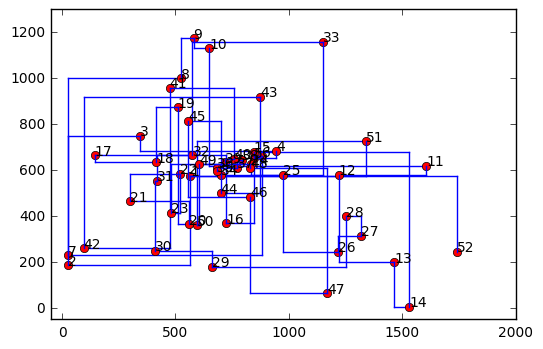

In [100]:
plot_path(test_points)

In [126]:
# Task 3 (Simulated Annealing)

In [134]:
def get_probability(prev_score, next_score, temperature):
    if next_score > prev_score:
        return 1.0
    else:
        return exp(-abs(next_score - prev_score) / temperature )

In [135]:
def get_permutation(points):
    bound = len(points) - 1
    item = list(points)
    i = random.randint(0, bound)
    j = random.randint(0, bound)
    item[i], item[j] = item[j], item[i]
    return item

In [136]:
def kirkpatrick_cooling(start_temp, alpha):
    T = start_temp
    while True:
        yield T
        T=alpha * T

In [137]:
temperatue = kirkpatrick_cooling(100, 0.99)

In [138]:
answer = list(I)
shuffle(answer)

In [139]:
for temp in temperatue:
    if temp < 0.001:
        break;
    neighbour = get_permutation(answer)
    prev_score = get_distance(answer)
    next_score = get_distance(neighbour)
    P = get_probability(prev_score, next_score, temp)
    if random.random() < P:
        answer = list(neighbour)
        print("Temperature:", temp)
        print("Distance:",get_distance(answer))

Temperature: 100
Distance: 38450
Temperature: 97.0299
Distance: 38500
Temperature: 95.09900499
Distance: 39290
Temperature: 94.1480149401
Distance: 39200
Temperature: 93.206534790699
Distance: 39900
Temperature: 91.35172474836409
Distance: 39780
Temperature: 90.43820750088045
Distance: 39870
Temperature: 86.00583546412885
Distance: 40280
Temperature: 85.14577710948755
Distance: 40280
Temperature: 84.29431933839268
Distance: 40360
Temperature: 83.45137614500875
Distance: 40500
Temperature: 80.97278682212585
Distance: 40740
Temperature: 80.1630589539046
Distance: 41090
Temperature: 79.36142836436555
Distance: 41140
Temperature: 78.56781408072189
Distance: 41140
Temperature: 75.47192872036327
Distance: 41180
Temperature: 74.71720943315964
Distance: 41180
Temperature: 71.7730532598275
Distance: 41335
Temperature: 69.64132180495736
Distance: 41420
Temperature: 68.94490858690779
Distance: 41330
Temperature: 67.57290490602833
Distance: 41330
Temperature: 65.56592205741438
Distance: 42420
Temp